In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

IMPORTING DATASET 

In [295]:
df = pd.read_excel("Data_Train.xlsx")

# the below line helps to view all the column name in the output
pd.set_option('display.max_columns',None)

In [296]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [298]:
df.shape

(10683, 11)

the df.info show there is one or two null values in the dataset, lets remove that 

In [299]:
df.dropna(inplace=True) #inplace true so the dataset itself is modified
df.index = range(len(df))

In [300]:
df.shape

(10682, 11)

In [301]:
df1 = df.copy()

Data Preparation 

1.Date_of_Journey column => changing the data type and splitting the date into month column and year column

In [302]:
type(df1.Date_of_Journey) #pandas.core.series.Series

pandas.core.series.Series

In [303]:
df1.Date_of_Journey = pd.to_datetime(df1.Date_of_Journey)

In [304]:
df1['Month_of_Journey'] = pd.DatetimeIndex(df1['Date_of_Journey']).month
df1.head()
#extracted month from the date_of_journey

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [305]:
df1['Year_of_Journey'] = pd.DatetimeIndex(df1['Date_of_Journey']).year
df1.head()
#extracted year from the date_of_journey

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019


In [306]:
df1['Day_of_Journey'] = pd.DatetimeIndex(df1['Date_of_Journey']).day
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019,3


In [307]:
# checking the years in the dataset 
df1.Year_of_Journey.value_counts()

#this shows that all the entries are from the same year , hence Im going to drop the year column

2019    10682
Name: Year_of_Journey, dtype: int64

In [308]:
#dropping the year column

df1.drop('Year_of_Journey', axis=1, inplace=True)

In [309]:
df1.columns #no year column

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey'],
      dtype='object')

In [310]:
#dropping the date_ofjourney column since we have already extracted the day and month of the journey

df1.drop('Date_of_Journey', axis=1, inplace=True)

In [311]:
#extracting the hour from depature time column
df1['Dep_Hour'] = pd.to_datetime(df1.Dep_Time).dt.hour

#extracting the minutes
df1['Dep_Minutes'] = pd.to_datetime(df1.Dep_Time).dt.minute

#now dropping the Dep_Time
df1.drop('Dep_Time', axis=1, inplace=True)


In [312]:
#extracting the hour from depature time
df1['Arrival_hour'] = pd.to_datetime(df1.Arrival_Time).dt.hour

#extracting the minutes
df1['Arrival_min'] = pd.to_datetime(df1.Arrival_Time).dt.minute

#now dropping the Dep_Time
df1.drop('Arrival_Time', axis=1, inplace=True)

In [313]:
df1.columns
#checking the columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minutes', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [314]:
#sample calculation to convert the Duration into minutes
samp = ['3h 50m','6h 7m']
for i in range(len(samp)):
    samp[i]=  eval(samp[i].replace("h", '*60').replace(' ','+').replace('m','*1'))
    
print (samp)

[230, 367]


In [315]:
duration = list(df1['Duration'])
print ((df1['Duration'].iloc[10681]))
for i in range(0,len(duration)):
    duration[i]=  int(eval(duration[i].replace("h", '*60').replace(' ','+').replace('m','*1')))
    

#converted Duration 00h 00m column into minutes


8h 20m


In [316]:
# substituted the 00h 00m into just integers(minutes) into main DataFrame
df1["Duration"] = duration

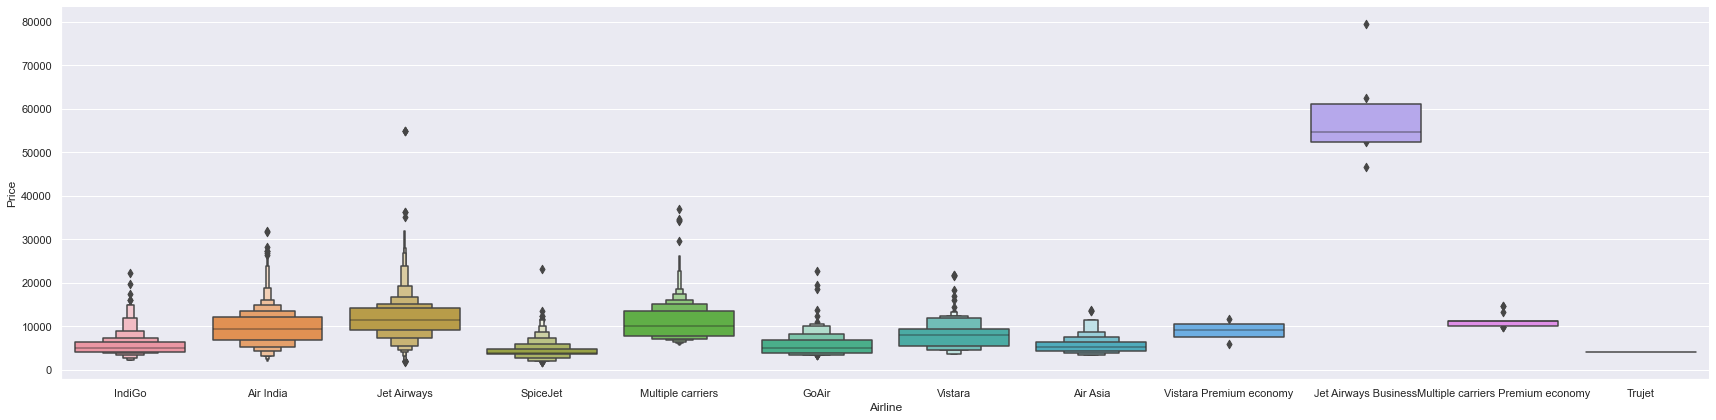

In [317]:
# flights and the distribution of their prices


g = sns.catplot(x="Airline", y="Price", data=df1,kind="boxen", height = 6, aspect = 4)



In [318]:
df1[df1.Price>60000].Airline
# checking the jet airways 

2924    Jet Airways Business
5372    Jet Airways Business
Name: Airline, dtype: object

# Handling Categorical Data 

1. the airline column here is categorical - and the order/rank doesn't matter , hence i am going to do one hot encoding here.
2. Source(place) - also a categorical column
3. Destination is also a categorical column

In [319]:
df1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [320]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [321]:
airlineColumn = df1['Airline']
integerLabelEncoding = LabelEncoder()
integerLabelEncoded = integerLabelEncoding.fit_transform(airlineColumn)
integerLabelEncoded
#will not be using this , because the model may consider this as a ranking parameter 

array([ 3,  1,  4, ...,  4, 10,  1])

In [322]:
Airline = df1['Airline']
Airline = pd.get_dummies(airlineColumn, drop_first=True)
# drop_first=True is important to use, as it helps in reducing the extra
# column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables. SOURCE : stackoverflow.com
#len(one_hot_encoded_data.columns) 
Airline.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')

In [323]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [324]:
#Source = df1.Source
Source = df1[['Source']] # when you use this line, see the column names have 'source' infront of it
Source = pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


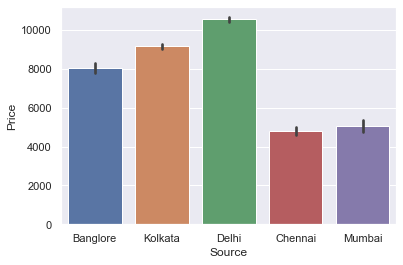

In [325]:
g = sns.barplot(x="Source", y="Price", data=df1)#,kind="boxen", height = 6, aspect = 4)


In [326]:
df1.Destination.unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [327]:
Destination = df1.Destination

Destination = pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [328]:
#lets explore 'Additional_Info'
df1.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [329]:
df1.Additional_Info.value_counts()
# you can see more than 80% of additional info is no info , so its not worth considering

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [330]:
df1['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10677                CCU → BLR
10678                CCU → BLR
10679                BLR → DEL
10680                BLR → DEL
10681    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [331]:
df1.Total_Stops

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10677    non-stop
10678    non-stop
10679    non-stop
10680    non-stop
10681     2 stops
Name: Total_Stops, Length: 10682, dtype: object

### from the above two cells , you can see that , they(Total_Stops,Route) are related 
### so we're gonna remove Route,Additional_Info .
### Route because its related to Total_stops and Additional_Info because 80% of the value is no_info


In [332]:

df1.drop(columns=['Route','Additional_Info'], axis=1, inplace=True)

In [333]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Dep_Minutes',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [334]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35


In [335]:
df1.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

# Important : 
## Take a look at Total_Stops , while thinking about encoding , one hot encoding could be a way to do it, but here lies the important fact , when you have more stops the price is more and when you have less stops/no stops the price is less. Hence it is has to be ORDINAL encoding(Label encoding)
### check out nominal vs ordinal encoding

In [336]:
df1.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [337]:
df1.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [338]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35


In [339]:
df1.shape

(10682, 12)

In [340]:
data_train = pd.concat([df1,Airline,Source,Destination],axis=1)  #DO NOT FORGET AXIS =1


In [341]:
data_train.shape

(10682, 32)

In [342]:
data_train.drop(["Airline","Source","Destination"],inplace = True,axis = 1) 

In [343]:
data_train.shape

(10682, 29)

In [344]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Month_of_Journey',
       'Day_of_Journey', 'Dep_Hour', 'Dep_Minutes', 'Arrival_hour',
       'Arrival_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi'],
      dtype='object')

In [345]:
df2 = pd.read_excel("Test_set.xlsx")

In [346]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [347]:
df2.dropna(inplace=True) #inplace true so the dataset itself is modified
df2.index = range(len(df2))
df2.Date_of_Journey = pd.to_datetime(df2.Date_of_Journey)
df2['Month_of_Journey'] = pd.DatetimeIndex(df2['Date_of_Journey']).month
df2['Year_of_Journey'] = pd.DatetimeIndex(df2['Date_of_Journey']).year
df2['Day_of_Journey'] = pd.DatetimeIndex(df2['Date_of_Journey']).day
df2.drop('Year_of_Journey', axis=1, inplace=True)
df2.drop('Date_of_Journey', axis=1, inplace=True)
#extracting the hour from depature time column
df2['Dep_Hour'] = pd.to_datetime(df2.Dep_Time).dt.hour

#extracting the minutes
df2['Dep_Minutes'] = pd.to_datetime(df2.Dep_Time).dt.minute

#now dropping the Dep_Time
df2.drop('Dep_Time', axis=1, inplace=True)
#extracting the hour from depature time
df2['Arrival_hour'] = pd.to_datetime(df2.Arrival_Time).dt.hour

#extracting the minutes
df2['Arrival_min'] = pd.to_datetime(df2.Arrival_Time).dt.minute

#now dropping the Dep_Time
df2.drop('Arrival_Time', axis=1, inplace=True)

In [348]:
df2.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minutes', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [349]:
duration = list(df2['Duration'])

for i in range(0,len(duration)):
    duration[i]=  int(eval(duration[i].replace("h", '*60').replace(' ','+').replace('m','*1')))


df2["Duration"] = duration

Airline = df2['Airline']
Airline = pd.get_dummies(airlineColumn, drop_first=True)

Source = df2[['Source']] # when you use this line, see the column names have 'source' infront of it
Source = pd.get_dummies(Source,drop_first=True)

Destination = df2.Destination

Destination = pd.get_dummies(Destination,drop_first=True)

df2.drop(columns=['Route','Additional_Info'], axis=1, inplace=True)

df2.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)
data_test = pd.concat([df2,Airline,Source,Destination],axis=1)

data_test.drop(["Airline","Source","Destination"],inplace = True,axis = 1) 



In [350]:
data_test.columns

Index(['Duration', 'Total_Stops', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minutes', 'Arrival_hour', 'Arrival_min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

### MODELING 

In [351]:
# will be storing all the columns except 'price' column
X = data_train.loc[:,['Duration', 'Total_Stops', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minutes', 'Arrival_hour', 'Arrival_min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi']]

In [352]:
X.head()

,Duration,Total_Stops,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minutes,Arrival_hour,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [353]:
y = data_train.loc[:,['Price']]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


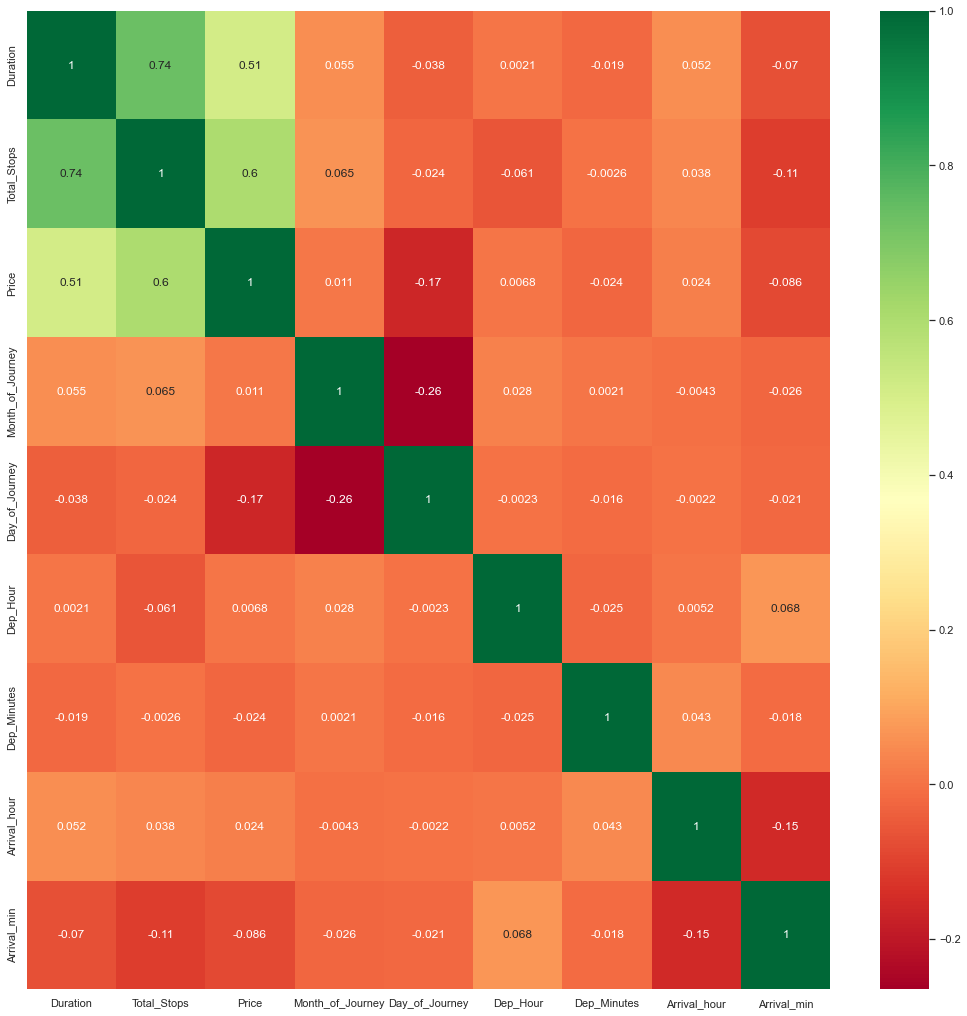

In [354]:
# draw the heat map to view the correlation between X & y (Independent & dependent variables)
plt.figure(figsize = (18,18))
sns.heatmap(df1.corr(), annot = True, cmap="RdYlGn")

plt.show()

In [355]:
X.shape

(10682, 28)

In [356]:
y.shape

(10682, 1)

In [358]:
# using ExtraTreesRegressor to perform feature selection

from sklearn.ensemble import ExtraTreesRegressor
ftSelect = ExtraTreesRegressor()
ftSelect.fit(X,y.Price)

ExtraTreesRegressor()

In [359]:
ftSelect.feature_importances_

array([9.76497396e-02, 2.33787003e-01, 8.56145901e-02, 1.07783724e-01,
       2.80398505e-02, 2.58009875e-02, 3.12157259e-02, 2.39785406e-02,
       9.75437835e-03, 2.06436563e-03, 1.73611282e-02, 1.52597118e-01,
       6.78982051e-02, 1.97184369e-02, 9.22907202e-04, 3.69647229e-03,
       1.24934752e-04, 4.94006605e-03, 1.20151976e-04, 3.73548439e-04,
       9.86298911e-03, 4.22370669e-03, 9.79567671e-03, 1.42023515e-02,
       1.74433373e-02, 7.36424841e-03, 4.81396291e-04, 2.31844188e-02])

In [360]:
imp  = pd.DataFrame(ftSelect.feature_importances_)

In [361]:
imp

,0
0,0.097650
1,0.233787
2,0.085615
3,0.107784
4,0.028040
5,0.025801
6,0.031216
7,0.023979
8,0.009754
9,0.002064


In [362]:
cols = pd.DataFrame(X.columns)
cols

,0
0,Duration
1,Total_Stops
2,Month_of_Journey
3,Day_of_Journey
4,Dep_Hour
5,Dep_Minutes
6,Arrival_hour
7,Arrival_min
8,Air India
9,GoAir


In [363]:
ftImpdf = pd.DataFrame()
ftImpdf['features'] = cols
ftImpdf['importance'] = imp

ftImpdf.sort_values(by='importance',inplace=True)
ftImpdf

,features,importance
18,Vistara Premium economy,0.000120
16,Trujet,0.000125
19,Source_Chennai,0.000374
26,Kolkata,0.000481
14,Multiple carriers Premium economy,0.000923
9,GoAir,0.002064
15,SpiceJet,0.003696
21,Source_Kolkata,0.004224
17,Vistara,0.004940
25,Hyderabad,0.007364


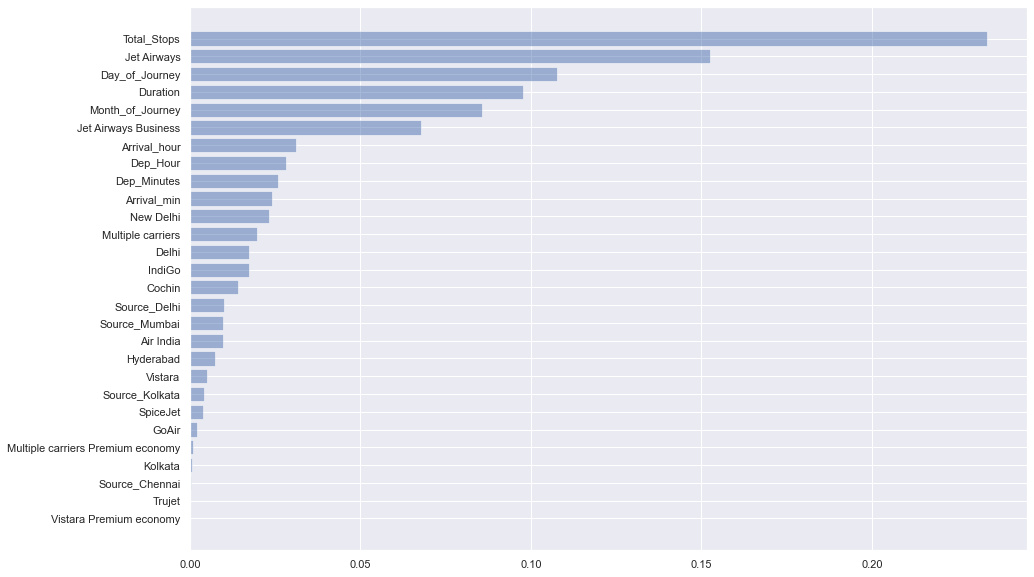

In [364]:
plt.figure(figsize = (15,10))
plt.barh( ftImpdf['features'],ftImpdf['importance'], align='center', alpha=0.5)
#plt.xticks(ftImpdf['features'], ftImpdf['importance'])
#plt.ylabel('Usage')
#plt.title('Programming language usage')
plt.show()

In [389]:
# remember X and y are from data_train

from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [390]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressModel = RandomForestRegressor()
RandomForestRegressModel.fit(X_train,y_train)


C:\Users\sandy\AppData\Local\Temp/ipykernel_36512/2496339533.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressModel.fit(X_train,y_train)


RandomForestRegressor()

In [391]:
# r2 score for training data
RandomForestRegressModel.score(X_train,y_train)

0.9517127167805747

In [392]:
# r2 score for testing  data
RandomForestRegressModel.score(X_test,y_test)

0.812561781888164

In [393]:
y_pred = RandomForestRegressModel.predict(X_test)

## Compare the actual and predicted values

In [394]:
test = y_test.reset_index(drop=True)
test

,Price
0,16655
1,4959
2,9187
3,3858
4,12898
...,...
2132,7408
2133,4622
2134,7452
2135,8824


In [395]:
compare= pd.DataFrame()
compare["predicted"] = pd.Series(y_pred)
compare["actual"] = test
compare



,predicted,actual
0,16708.750000,16655
1,6231.000000,4959
2,8917.480000,9187
3,3644.810000,3858
4,14764.933333,12898
...,...,...
2132,12274.881667,7408
2133,5183.650000,4622
2134,6760.140000,7452
2135,12740.145000,8824


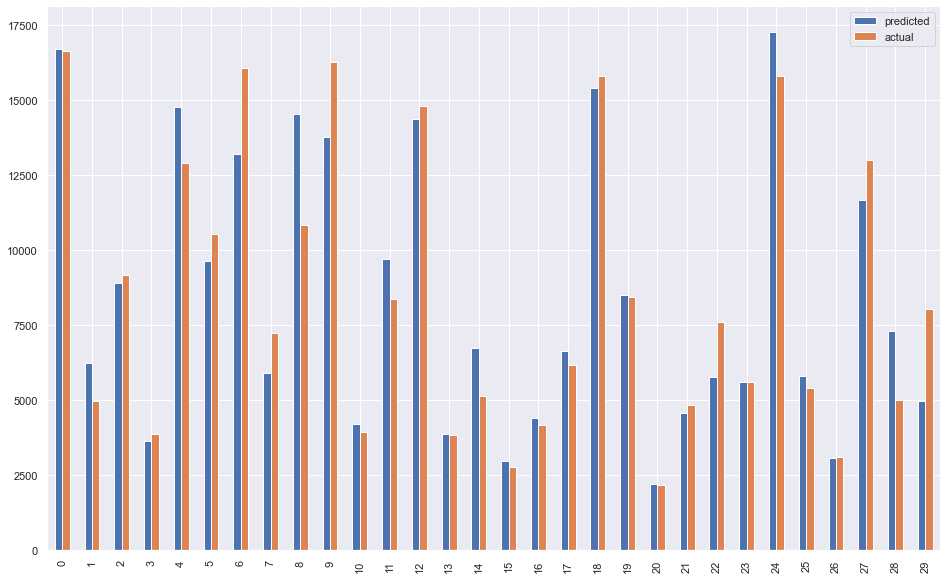

In [396]:
c = compare.head(30)
c.plot(kind='bar',figsize=(16,10))
plt.show()
# comparing few values

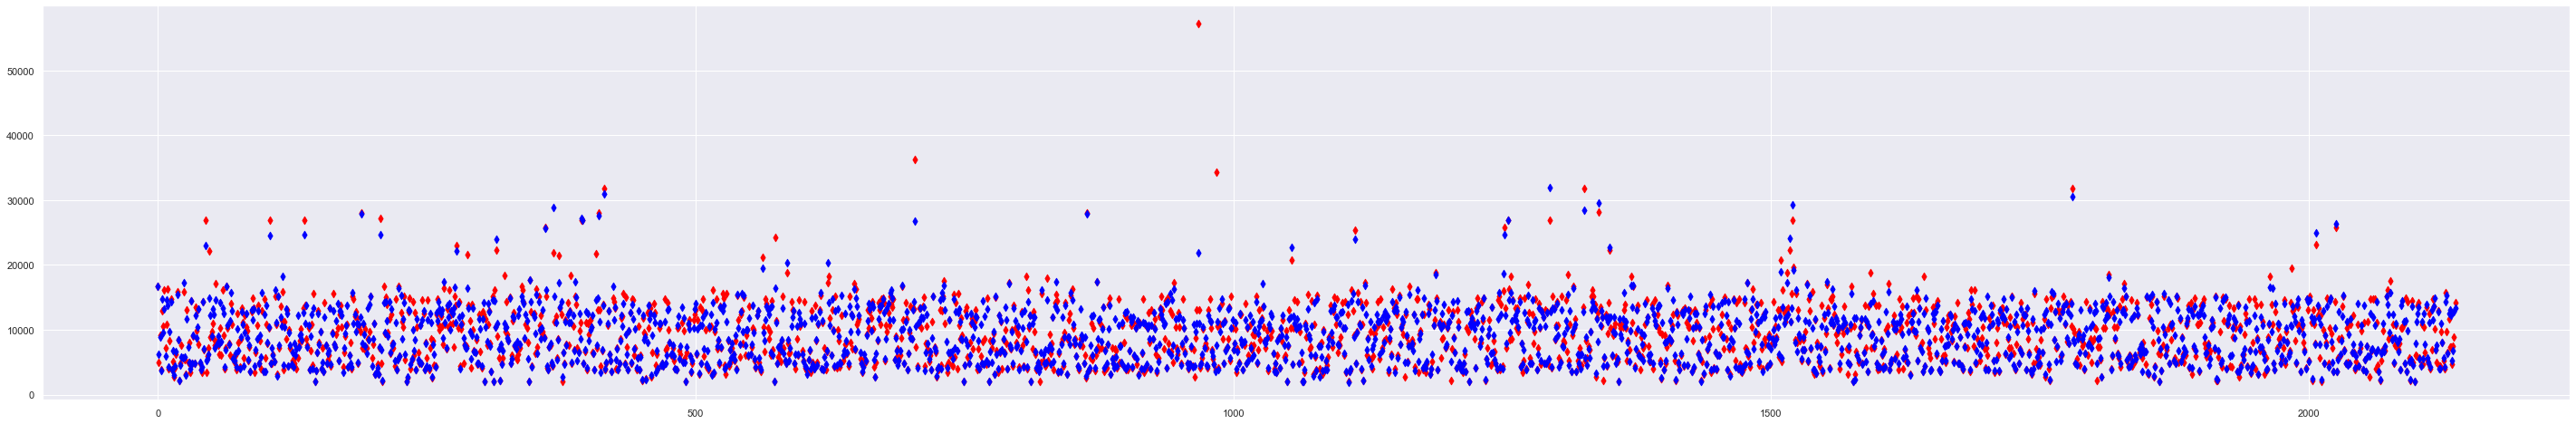

In [397]:
plt.figure(figsize=(50,8))
plt.scatter(range(len(y_test)), y_test, marker='d', c='red')
plt.scatter(range(len(compare["predicted"])), compare["predicted"], marker='d', c='blue')


C:\Users\sandy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


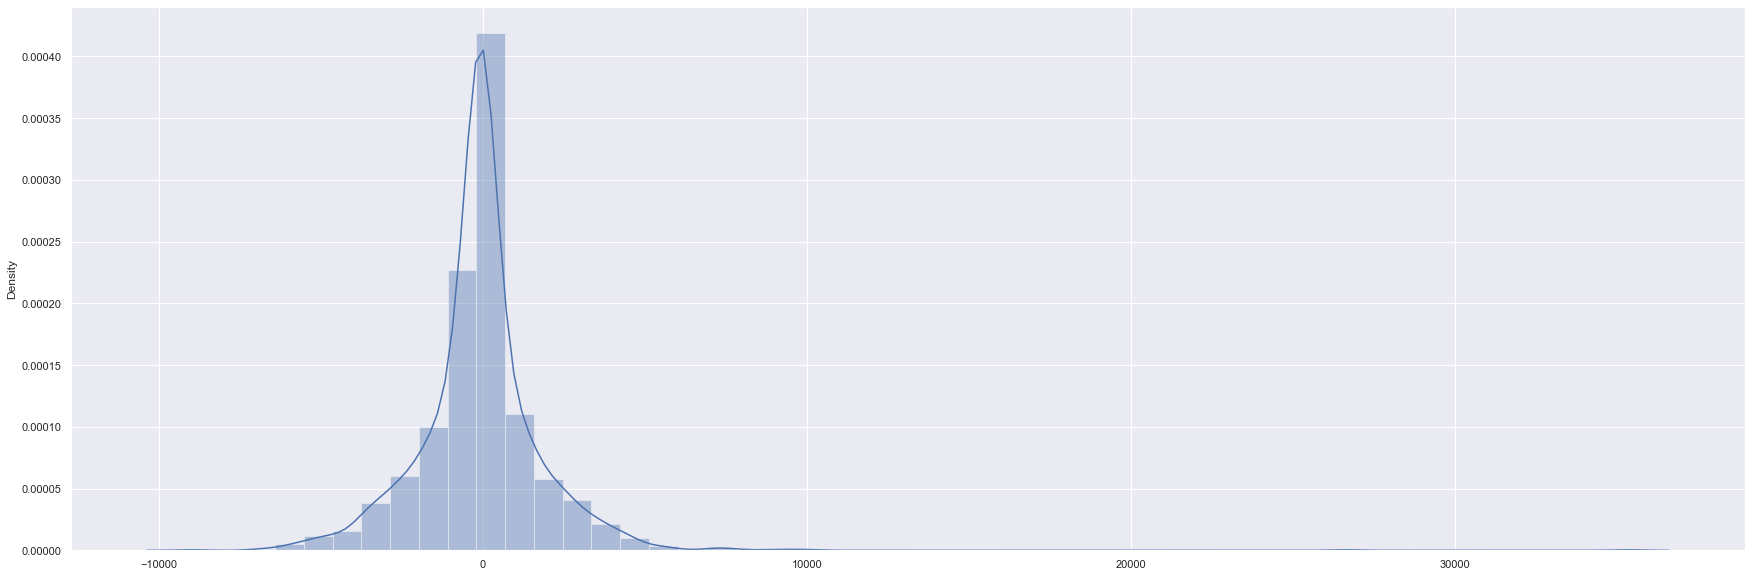

In [398]:
plt.figure(figsize=(30,10))
sns.distplot(compare["actual"] -compare["predicted"])
plt.show()

You can think of the density graph that it shows the relative number of occurrences of the data at given values. The values in question are differences between observed and fitted variable values. If the fit was perfect, all the differences would have been 0, and there would have been just one bar at 0. The fit is not perfect, and there are some differences greater or smaller than 0, but they are not too far from zero.

the graph does not prove the differences are close to zero, but it suggests the differences are centered around zero. Generally, it is a good result for linear regression.

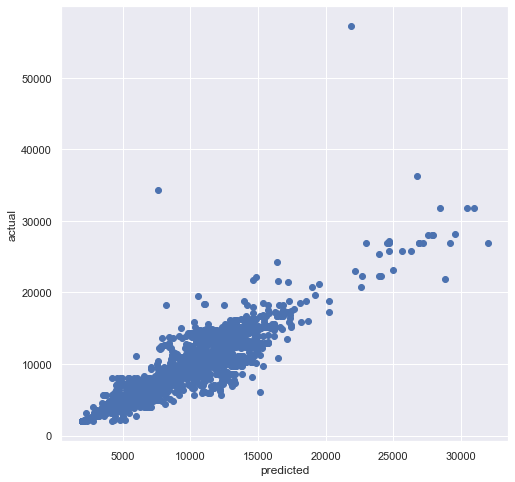

In [399]:
plt.figure(figsize=(8,8))
plt.scatter(compare["predicted"] ,compare["actual"] )
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [400]:
from sklearn import metrics
import numpy as np

In [401]:
print('MAE : ',metrics.mean_absolute_error(compare["predicted"] ,compare["actual"]))
print('MSE : ',metrics.mean_squared_error(compare["predicted"] ,compare["actual"]))
print('MAE : ',np.sqrt( metrics.mean_squared_error(compare["predicted"] ,compare["actual"])))
print('R2 score: ',metrics.r2_score(compare["predicted"] ,compare["actual"]))

MAE :  1184.7883672714095
MSE :  4041553.4162279298
MAE :  2010.3615138148486
R2 score:  0.779922717542753


# HYPER PARAMETER TUNING


1) Manual Search
2) Grid Search
3) Randomized Search
4) Halving Grid Search
5) Halving Randomized Search
6) HyperOpt-Sklearn
7) Bayes Search

I'll be trying Randomized Search & Grid Search 

## Randomized Search:

Grid Search tries all combinations of hyperparameters which would result in increasing time complexity of the computation. 
Randomized Search trains model on random hyperparameter combination.
The total number of combinations on which the several models are trained is less for randomized search compared to grid search.

In [403]:
from sklearn.model_selection import RandomizedSearchCV

In [404]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100, 1200 ,12)]

#number of features that can be considered at every split 
max_features = ['auto', 'sqrt']

#maximum number of depth/levels in tree 
max_depth = [int(x) for x in np.linspace(5, 30 ,6)]

#maximum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [405]:
# creating the random grid 
random_grid = {
    "n_estimators" : n_estimators,
    "max_features" : max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf

}

In [412]:
#rf_search = RandomizedSearchCV(estimator=RandomForestRegressModel, param_distributions= random_grid,n_iter=8,cv = 5,random_state=42,n_jobs=1)
rf_search = RandomizedSearchCV(estimator=RandomForestRegressModel, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [413]:
#y train is in dataframe format , converting into list

y_train =list( y_train['Price'])


TypeError: list indices must be integers or slices, not str

In [414]:
rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

n_jobs
In the context of RandomizedSearchCV (and all other search estimators), a "job" refers to the training and evaluation of a ((train/test split), parameter_combination) pair. For example if you're running 5-fold cv with n_iter=10 (or equivalently a 2 x 5 grid if you're using GridSearchCV), you have potentially 50 jobs.

Whether jobs are instantiated as threads or processes depends on the joblib backend in use, and can be configured. By default, processes are created.

(Note: a short one-line description of n_jobs for the search estimators would be welcome and is the purpose of #14228, if anyone wants to tackle that)

In [415]:
rf_search.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [417]:
pred2 = rf_search.predict(X_test)

In [ ]:

y_test =list( y_test['Price'])
y_test

C:\Users\sandy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


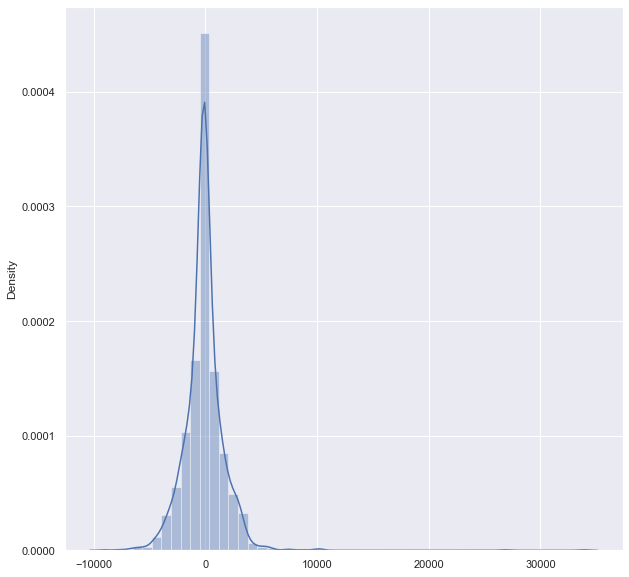

In [424]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred2)
plt.show()

In [425]:
print('MAE : ',metrics.mean_absolute_error(pred2 ,compare["actual"]))
print('MSE : ',metrics.mean_squared_error(pred2 ,compare["actual"]))
print('MAE : ',np.sqrt( metrics.mean_squared_error(pred2,compare["actual"])))
print('R2 score: ',metrics.r2_score(pred2,compare["actual"]))

MAE :  1154.064046231146
MSE :  3631677.3173043896
MAE :  1905.6960191238238
R2 score:  0.7958396810233253


In [ ]:
plt.scatter(x = )